In [1]:
import cv2
import sys
import numpy as np
import argparse
import chainer
from entity import params
from pose_detector import PoseDetector, draw_person_pose
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def select_region(image):
    if len(image.shape) == 3:
        high, wid, ch = image.shape
    else:
        high, wid = image.shape

    # make area
    bottom_left  = [wid*0.1, high*1]
    top_left     = [wid*0.30, high*0.3]
    bottom_right = [wid*0.9, high*1]
    top_right    = [wid*0.7, high*0.3]
    # polygons 
    poly = np.array([[bottom_left, top_left, top_right, bottom_right]], dtype=np.int32)
    mask = np.zeros_like(image)
    if len(mask.shape)==2:
        cv2.fillPoly(mask, poly, 255)
    else:
        # in case of channel=3
        cv2.fillPoly(mask, poly, (255,)*mask.shape[2])

    return cv2.bitwise_and(image, mask), mask


In [3]:
#load model
pose_detector = PoseDetector("posenet", "models/coco_posenet.npz", device=-1, precise=True)

Loading the model...


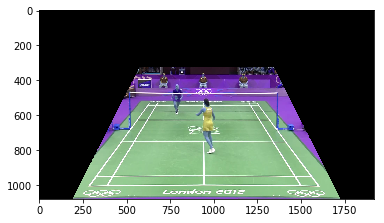

In [4]:
# read image
img = cv2.imread('../pyfiles/dataset/youtube_baun/img_08310.png')
# select detection area
img, mask = select_region(img)
plt.imshow(img)
# inference
poses, scores = pose_detector(img)
#res_img = cv2.addWeighted(img, 0.6, draw_person_pose(img, poses), 0.4, 0)
img = draw_person_pose(img, poses)

[ 24.00529083  23.33711345  20.907868    15.83386008  13.54632336
   1.85889074   2.63070429]


True

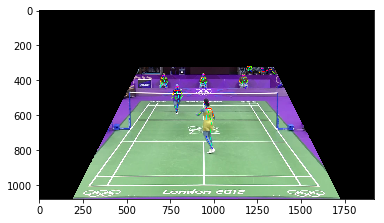

In [24]:
plt.imshow(img)
print(scores)
cv2.imwrite('./data/crop.png', img)

<class 'numpy.ndarray'>


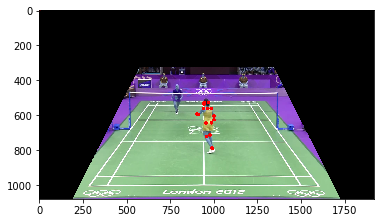

In [5]:
img = cv2.imread('../pyfiles/dataset/youtube_baun/img_08310.png')
img, mask = select_region(img)
plt.imshow(img)
i = 0
unit_length = pose_detector.get_unit_length(poses[i])
print(type(poses[i]))
for i, pose in enumerate(poses[i].astype(int)):
    img = cv2.circle(img, tuple(pose[0:2]), 10, (255, 0, 0), -1)
plt.imshow(img)

In [15]:
# define new function to crop person(bbox)
i = 0
print(person_pose_array[i])


[[   0    0    0]
 [ 966  560    2]
 [ 990  563    2]
 [1000  604    2]
 [ 996  627    2]
 [ 943  560    2]
 [ 910  600    2]
 [ 903  594    2]
 [ 990  648    2]
 [ 980  718    2]
 [ 993  789    2]
 [ 953  648    2]
 [ 953  722    2]
 [ 990  793    2]
 [   0    0    0]
 [   0    0    0]
 [ 973  529    2]
 [ 946  529    2]]


(909, 339, 972, 483)
40.6138184203
144


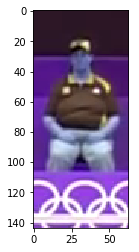

In [16]:
i = 2
# detect person
cropped_person_img, bbox = pose_detector.crop_person(img, poses[i], unit_length) 
if cropped_person_img is not None:
    # cv2.rectangle(res_img, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (255, 255, 255), 1)
    print(bbox)
    print(unit_length)
    if (bbox[3]-bbox[1] > 120):
        crop_img = img[bbox[1]:bbox[3], bbox[0]:bbox[2]] #bbox=(x_lefttop,y)
        plt.imshow(crop_img)
        print(bbox[3] - bbox[1])
    else:
        print(bbox[3] - bbox[1])

In [13]:
pose = person_pose_array[0]
pose[0:2]

array([[  0,   0,   0],
       [966, 560,   2]])

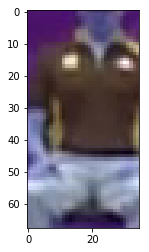

In [82]:
# each person detected
for i, person_pose in enumerate(person_pose_array):
    unit_length = pose_detector.get_unit_length(person_pose)
    # detect person
    cropped_person_img, bbox = pose_detector.crop_person(img, person_pose, unit_length) 
    if cropped_person_img is not None:
         #cv2.rectangle(res_img, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (255, 255, 255), 1)
            crop_img = img[bbox[1]:bbox[3], bbox[0]:bbox[2]] #bbox=(x_lefttop,y)
            plt.imshow(crop_img)
            cv2.imwrite('./data/crop_{0:02d}.png'.format(i), crop_img)